#Dimensionality Reduction on the Wine Dataset with UMAP and Clustering
## Introduction
This Colab notebook demonstrates the use of dimensionality reduction, specifically using UMAP (Uniform Manifold Approximation and Projection), on the Wine dataset from sklearn. The notebook will explore how UMAP can be applied to reduce the dimensionality of the dataset, followed by clustering techniques to group similar samples. Additionally, the reduced features will be used for classification, showcasing them as an effective feature extraction technique.

## Dataset
The Wine dataset is a popular dataset for classification tasks, consisting of chemical analyses of wines grown in the same region in Italy but derived from three different cultivars. The dataset contains 13 different attributes, such as alcohol, malic acid, and color intensity.

Loading and Preprocessing the Wine Dataset

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

Applying UMAP for Dimensionality Reduction

In [10]:
!pip install umap-learn

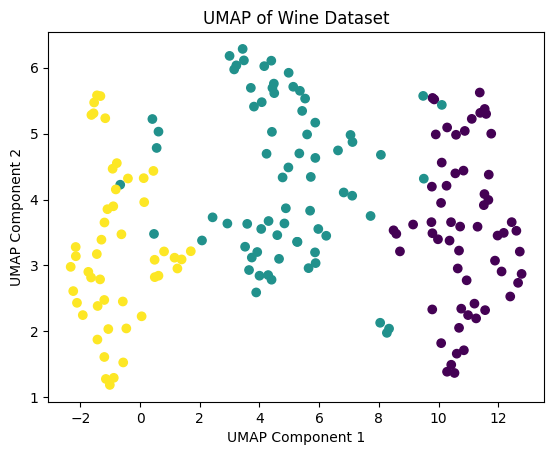

In [15]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Applying UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, metric='euclidean')
X_umap = umap_model.fit_transform(X_scaled)

# Visualizing UMAP
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_wine)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of Wine Dataset')
plt.show()


In [13]:
!pip show umap-learn

Name: umap-learn
Version: 0.5.5
Summary: Uniform Manifold Approximation and Projection
Home-page: http://github.com/lmcinnes/umap
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numba, numpy, pynndescent, scikit-learn, scipy, tqdm
Required-by: 


Clustering on the Reduced Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


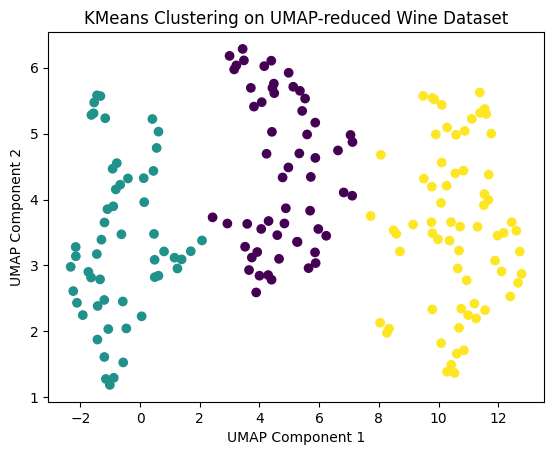

In [16]:
from sklearn.cluster import KMeans

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Visualizing the clusters
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('KMeans Clustering on UMAP-reduced Wine Dataset')
plt.show()

Using Reduced Features for Classification

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_umap, y_wine, test_size=0.3, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy with UMAP Features: {accuracy}")

Classification Accuracy with UMAP Features: 0.9629629629629629
